In [1]:
import pandas as pd
import numpy as np

In [74]:
apt_trd = pd.read_csv('../data/raw_data/apt_trd_price_info_contest.csv', encoding = 'cp949')
apt_anc = pd.read_csv('../data/raw_data/apt_anc_price_info_contest.csv', encoding = 'cp949')

In [75]:
print(len(apt_trd),len(apt_anc))
print(len(apt_trd['apt_cd'].value_counts()),len(apt_anc['apt_cd'].value_counts()))

1192 3840
706 687


In [76]:
def counting_equal(df1, df2):
    count = 0
    for i in (df1['apt_cd']):
        for j in (df2['apt_cd']):
            if i == j:
                count = count + 1
                break
    print("일치하는 아파트 코드 개수 : {}개 중 {}개".format(df1.shape[0], count))
    
def value_equal(df1, df2):
    count = 0
    for i in (df1['apt_cd'].unique()):
        for j in (df2['apt_cd'].unique()):
            if i == j:
                count = count + 1
                break
    print("일치하는 아파트 코드 개수 : {}개 중 {}개".format(len(df1['apt_cd'].unique()), count))

counting_equal(apt_trd,apt_anc)
value_equal(apt_trd,apt_anc)
print('########################################')
counting_equal(apt_anc,apt_trd)
value_equal(apt_anc,apt_trd)

일치하는 아파트 코드 개수 : 1192개 중 1166개
일치하는 아파트 코드 개수 : 706개 중 686개
########################################
일치하는 아파트 코드 개수 : 3840개 중 3834개
일치하는 아파트 코드 개수 : 687개 중 686개


In [77]:
elevate = pd.read_csv('../data/other_data/ES1001AJ00101YY2300_csv.csv',sep='|')
elevate.columns = ['단지고유번호','필지고유번호','도로명관리번호','시군구코드','지번주소','공시가격기반단지명','단지종류코드','동수','세대수','사용승인일자','아파트단지내표고평균값','아파트단지내표고최저값','아파트단지내표고최고값','아파트단지인근표고평균값','아파트단지인근표고최저값','아파트단지인근표고최고값']
elevate = elevate[elevate['지번주소'].str.contains('서울특별시')]


In [78]:
tilt = pd.read_csv('../data/other_data/ES1001AI00101YY2300_csv.csv',sep='|')
tilt.columns = ['단지고유번호','필지고유번호','도로명관리번호','시군구코드','지번주소','공시가격기반단지명','단지종류코드','동수','세대수','사용승인일자','아파트단지내경사도평균값','아파트단지내경사도최저값','아파트단지내경사도최고값','아파트단지인근경사도평균값','아파트단지인근경사도최저값','아파트단지인근경사도최고값']
tilt = tilt[tilt['지번주소'].str.contains('서울특별시')]

In [79]:
'''elevate.to_feather('../data/make_data/고도데이터.feather')
tilt.to_feather('../data/make_data/경사데이터.feather')'''

"elevate.to_feather('../data/make_data/고도데이터.feather')\ntilt.to_feather('../data/make_data/경사데이터.feather')"

# 신축건축물정보.csv

In [2]:
new_apt = pd.read_csv('../data/other_data/ES1001AE00101MM2210_csv.csv',sep='|')
new_apt.columns = ['건축물대장고유번호','필지고유번호','지번주소','신축건축물정보도로명주소코드','도로명','지목명','용도지역명','용도지구명','용도구역명','신축구분명','주부속건물구분코드','건물명','동명','대지면적','건축면적','이전건물면적','연면적','이전연면적','건물주용도명','이전건물주용도명','건물구조명','이전건물구조명','폐쇄말소일자','건축허가일자','건축착공일자','사용승인일자','폐쇄말소구분명','폐쇄말소주건물수','폐쇄말소부속건물수']
new_apt.drop(columns=['건축물대장고유번호','필지고유번호','신축건축물정보도로명주소코드','지목명','용도지역명','용도지구명','용도구역명','주부속건물구분코드','이전건물주용도명','건물구조명','이전건물구조명','폐쇄말소일자','폐쇄말소구분명','폐쇄말소주건물수','폐쇄말소부속건물수'],inplace = True)
new_apt['건물주용도명'].value_counts()

단독주택          3006
제2종근린생활시설     1342
제1종근린생활시설      769
창고시설           525
공장             387
동.식물관련시설       369
공동주택           297
야영장시설           94
업무시설            58
숙박시설            51
자동차관련시설         46
위험물저장및처리시설      18
노유자시설           15
교육연구시설          15
운동시설            14
자원순환관련시설        10
의료시설             7
종교시설             7
문화및집회시설          6
판매시설             4
발전시설             2
묘지관련시설           2
방송통신시설           1
관광휴게시설           1
위락시설             1
Name: 건물주용도명, dtype: int64

In [81]:
print(new_apt['동명'])
print(new_apt['신축구분명'])

0       주건축물제1동
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
7042       115동
7043       116동
7044       117동
7045        NaN
7046        NaN
Name: 동명, Length: 7047, dtype: object
0       신축허가
1       신축허가
2       신축허가
3       신축허가
4       신축허가
        ... 
7042    신축허가
7043    신축허가
7044    신축허가
7045    신축신고
7046    신축신고
Name: 신축구분명, Length: 7047, dtype: object


#### 동명은 불필요한 정보로 보이므로 drop, 신축구분명은 다른 column으로 대체가능하므로 drop

In [82]:
new_apt.drop(columns = ['동명','신축구분명'],inplace=True)

In [83]:
new_apt.to_feather('../data/make_data/신축건축물정보.feather')

# 주택분양_고객특성정보.csv

In [3]:
customer = pd.read_csv('../data/other_data/ES1002AA00101MM2212_csv.csv')
customer

,사업지구명,블록명,동번호,계약일자,연령,성별,거주지역명
0,위례,A1-11,2408,20120309,52,여자,서울특별시 강서구
1,"대구율하2(02,GB)",C-2,1209,20091109,67,여자,대구광역시 동구
2,파주금촌(2),B1,401,20020424,55,남자,경기 고양시 일산구
3,성남판교(택),A27-1,2715,20061117,64,여자,경기도 성남시 분당구
4,"광주진월(02,택GB)",B-2,704,20100902,41,여자,전라남도 나주시 봉황면
...,...,...,...,...,...,...,...
154533,"부산만덕5(06,주환1)",01,103,20161125,81,남자,부산광역시 북구
154534,고양장항,A-4,403,20210513,36,남자,경기도 고양시 덕양구
154535,진주신안,01,106,19970304,54,남자,경상남도 사천시 정동면
154536,고양지축,A-1,105,20200225,44,남자,경기도 시흥시


### 현재 가지고 있는 실매가 데이터와 연동할 수단이 없어보이므로 기각

# 주택_인허가_정보.csv

In [85]:
permit = pd.read_csv('../data/other_data/ES1002AD00101MM2212_csv.csv')
permit

,사업지구명,사업유형,블록명,승인차수,최초승인일자,변경승인일자,승인권자,시도명,사업면적,대지면적,총면적,법상용적율,사업용적율,건폐율,세대수
0,"광주효천2(05,국민1)",보금자리(전환),A-4,3,20141128,20151006,국토교통부장관,광주광역시 남구,21410.7,21410.7,54833.440,187.85,191.41,17.81,902
1,김천삼락(행복),행복주택,1,0,20151224,20151224,국토교통부 장관,경상북도 김천시,10585.0,10585.0,21846.670,162.93,161.43,20.88,410
2,"대구율하2(02,GB)",보금자리(국임),A-1,0,20031231,20031231,대구광역시장,대구광역시 동구,36521.0,36521.0,68081.984,161.44,160.55,15.93,860
3,고양삼송,보금자리(국임),A23,0,20120119,20120119,경기도지사,경기도 고양시 덕양구,3173.1,3173.1,5662.860,123.61,123.61,22.59,40
4,"남양주가운(02,GB)",보금자리(국임),B1,2,20040605,20080627,경기도지사,경기도 남양주시,12513.4,12513.4,24899.160,162.54,161.85,15.23,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,"시흥장현(06,택(GB))",보금자리(전환),A-11,5,20171031,20171031,국토교통부장관,경기도 시흥시,51701.0,51659.0,88776.210,137.89,139.38,13.39,1292
2232,시흥거모(공공주택),공공주택,A5,0,20211231,20211231,국토교통부장관,경기도 시흥시,19250.0,19250.0,65197.060,199.45,201.18,22.05,460
2233,안산신길2,공공주택,"A-2,4",1,20211103,20211231,국토교통부,경기도 안산시 단원구,22912.0,22912.0,67968.790,186.11,187.55,30.30,474
2234,"시흥장현(06,택(GB))",보금자리(전환),C-3,0,20080829,20080829,국토해양부장관,경기도 시흥시,32295.0,32295.0,70064.530,171.03,174.52,15.31,937


### LH에서 추진하는 주택건설 사업만을 포함하는 데이터이므로 사용하기 어려워보임. 따라서 보류.

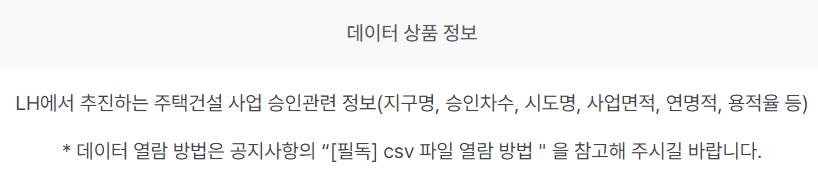

# 노후건축물정보.csv

In [86]:
old_building = pd.read_csv('../data/other_data/ES1006AE00101YY2200_csv.csv',encoding='cp949',sep='|')
old_building.columns = ['필지고유번호','지번주소','도로명','건물명','건물구조코드','건물구조명','기타구조명','주용도코드','건물주용도명','기타용도명','사용승인일자','건물수집계','노후건물수집계']

/tmp/ipykernel_38023/2706268218.py:1: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  old_building = pd.read_csv('./ES1006AE00101YY2200_csv.csv',encoding='cp949',sep='|')


In [87]:
old_building.drop(columns=['필지고유번호','건물구조코드','건물구조명','기타구조명','주용도코드'],inplace=True)
old_building

,지번주소,도로명,건물명,건물주용도명,기타용도명,사용승인일자,건물수집계,노후건물수집계
0,서울특별시 종로구 사직동 181-6번지,서울특별시 종로구 경희궁3가길 8-5,NaN,단독주택,다가구주택(3가구),19970630.0,1.0,1.0
1,서울특별시 종로구 구기동 30-3번지,서울특별시 종로구 진흥로22가길 17-1,NaN,단독주택,주택,19660514.0,1.0,1.0
2,서울특별시 종로구 이화동 9-323번지,서울특별시 종로구 낙산성곽서길 103-20,NaN,단독주택,주택,19850629.0,1.0,1.0
3,서울특별시 종로구 숭인동 72-134번지,서울특별시 종로구 종로63마길 15,NaN,단독주택,다가구용단독주택(4가구),19961025.0,1.0,1.0
4,서울특별시 종로구 충신동 1-424번지,서울특별시 종로구 충신4나길 15-6,NaN,단독주택,주택,19780417.0,1.0,1.0
...,...,...,...,...,...,...,...,...
7915828,제주특별자치도 서귀포시 표선면 세화리 1515번지,제주특별자치도 서귀포시 표선면 세화로 32-1,NaN,단독주택,단독주택,20171030,1.0,0.0
7915829,제주특별자치도 서귀포시 서홍동 397-101번지,제주특별자치도 서귀포시 장수로87번길 3,NaN,단독주택,단독주택,19810305,1.0,1.0
7915830,제주특별자치도 서귀포시 표선면 표선리 2533번지,,NaN,단독주택,단독주택,20050916,1.0,1.0
7915831,제주특별자치도 서귀포시 도순동 1-1번지,제주특별자치도 서귀포시 중산간서로356번길 152-41,NaN,공장,공장,19830311,1.0,1.0


### 건물명에 결측치가 많아 drop

In [88]:
old_building.drop(columns = ['건물명'],inplace=True)
old_building

,지번주소,도로명,건물주용도명,기타용도명,사용승인일자,건물수집계,노후건물수집계
0,서울특별시 종로구 사직동 181-6번지,서울특별시 종로구 경희궁3가길 8-5,단독주택,다가구주택(3가구),19970630.0,1.0,1.0
1,서울특별시 종로구 구기동 30-3번지,서울특별시 종로구 진흥로22가길 17-1,단독주택,주택,19660514.0,1.0,1.0
2,서울특별시 종로구 이화동 9-323번지,서울특별시 종로구 낙산성곽서길 103-20,단독주택,주택,19850629.0,1.0,1.0
3,서울특별시 종로구 숭인동 72-134번지,서울특별시 종로구 종로63마길 15,단독주택,다가구용단독주택(4가구),19961025.0,1.0,1.0
4,서울특별시 종로구 충신동 1-424번지,서울특별시 종로구 충신4나길 15-6,단독주택,주택,19780417.0,1.0,1.0
...,...,...,...,...,...,...,...
7915828,제주특별자치도 서귀포시 표선면 세화리 1515번지,제주특별자치도 서귀포시 표선면 세화로 32-1,단독주택,단독주택,20171030,1.0,0.0
7915829,제주특별자치도 서귀포시 서홍동 397-101번지,제주특별자치도 서귀포시 장수로87번길 3,단독주택,단독주택,19810305,1.0,1.0
7915830,제주특별자치도 서귀포시 표선면 표선리 2533번지,,단독주택,단독주택,20050916,1.0,1.0
7915831,제주특별자치도 서귀포시 도순동 1-1번지,제주특별자치도 서귀포시 중산간서로356번길 152-41,공장,공장,19830311,1.0,1.0


In [89]:
old_building.isnull().sum()

지번주소            0
도로명             0
건물주용도명      31464
기타용도명       54198
사용승인일자     676229
건물수집계      458847
노후건물수집계    458847
dtype: int64

In [90]:
old_building['사용승인일자'] = old_building['사용승인일자'].str.replace('.0','',regex=False)
old_building.to_feather('../data/make_data/노후건축물정보.feather')

# 도시_내_가로구역별_재개발_가능성_예상_정보.csv

In [72]:
rebuild = pd.read_csv('../data/other_data/ES1006AF00101YY2200_csv.csv',sep='|')
rebuild.columns=['가로구역코드','가로구역면적','위도','경도','건물수집계','노후건물수집계','구역내세대수']
rebuild

,가로구역코드,가로구역면적,위도,경도,건물수집계,노후건물수집계,구역내세대수
0,G1111010200100020020,2063.628789,37.584825,126.966800,10.0,9.0,0.0
1,G1111017400105520000,612.490289,37.572048,127.010995,8.0,8.0,0.0
2,G1117011900100050086,1451.126577,37.540702,126.963550,5.0,3.0,10.0
3,G1111011300100360000,425.674461,37.577976,126.967434,1.0,1.0,0.0
4,G1111010100100040002,13797.697612,37.589684,126.967326,13.0,9.0,17.0
...,...,...,...,...,...,...,...
1758619,G1114016500107410000,543.668616,37.565831,127.018355,5.0,5.0,0.0
1758620,G1111017500100660001,1895.597842,37.574983,127.016281,14.0,11.0,8.0
1758621,G1111017500101810240,1.457031,37.576477,127.020375,0.0,0.0,0.0
1758622,G1111017500111650000,1511.308864,37.576809,127.022778,16.0,16.0,0.0


#### 1. 유용한 정보인지는 추후 판단이 필요. 우선 데이터 수집은 진행.
#### 2. 면적의 단위가 불확실. 분포로 보아 $m^2$일 것으로 추측.

In [73]:
rebuild['가로구역면적'].describe()

count    1.758624e+06
mean     4.211370e+04
std      1.139645e+06
min      2.275769e-02
25%      6.215346e+02
50%      2.877209e+03
75%      1.044471e+04
max      2.887235e+08
Name: 가로구역면적, dtype: float64

In [92]:
rebuild.to_feather('../data/make_data/재개발예상구역.feather')

# 인구성장성지수.csv

In [7]:
population = pd.read_csv('../other_data/ES1007AT00101MM2301_csv.csv',sep='|')
population.columns=['기준년월','필지고유번호','시도코드','시군구코드','법정동코드','인구성장성지수']

In [8]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623083 entries, 0 to 1623082
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   기준년월     1623083 non-null  int64  
 1   필지고유번호   1623083 non-null  int64  
 2   시도코드     1623083 non-null  int64  
 3   시군구코드    1623083 non-null  int64  
 4   법정동코드    1623083 non-null  int64  
 5   인구성장성지수  1623083 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 74.3 MB


### 서울에 해당하는 자료만 남기기

In [9]:
population = population[population['시도코드']==11]
population

,기준년월,필지고유번호,시도코드,시군구코드,법정동코드,인구성장성지수
0,202301,1111010100100010000,11,11110,11110101,33.17
1,202301,1111010100100030000,11,11110,11110101,19.74
2,202301,1111010100100030100,11,11110,11110101,30.88
3,202301,1111010100100040020,11,11110,11110101,40.58
4,202301,1111010100100060000,11,11110,11110101,36.55
...,...,...,...,...,...,...
196573,202301,1174011000107110000,11,11740,11740110,29.18
196574,202301,1174011000107120000,11,11740,11740110,31.26
196575,202301,1174011000107170000,11,11740,11740110,42.60
196576,202301,1174011000107230000,11,11740,11740110,54.87


### 행정동코드에 속하는 주소 가져오기

In [57]:
division = pd.read_csv('../other_data/법정동코드_202301.csv')
division['주소'] = division['시도명'].fillna('')+division['시군구명'].apply(lambda x: '' if pd.isna(x) else ' ' + x)+division['읍면동명'].apply(lambda x: '' if pd.isna(x) else ' ' + x)+division['동리명'].apply(lambda x: '' if pd.isna(x) else ' ' + x)
division.drop(columns=['시도명','시군구명','읍면동명','동리명','말소일자','생성일자'],inplace=True)
division = division[division['법정동코드'].astype(str).str[:2]=='11']
division['법정동코드'] = (division['법정동코드']/100).astype(int)
division

,법정동코드,주소
0,11000000,서울특별시
1,11110000,서울특별시 종로구
2,11110101,서울특별시 종로구 청운동
3,11110102,서울특별시 종로구 신교동
4,11110103,서울특별시 종로구 궁정동
...,...,...
488,11740106,서울특별시 강동구 둔촌동
489,11740107,서울특별시 강동구 암사동
490,11740108,서울특별시 강동구 성내동
491,11740109,서울특별시 강동구 천호동


In [58]:
popular = pd.merge(population,division,on='법정동코드',how='left')
popular

,기준년월,필지고유번호,시도코드,시군구코드,법정동코드,인구성장성지수,주소
0,202301,1111010100100010000,11,11110,11110101,33.17,서울특별시 종로구 청운동
1,202301,1111010100100030000,11,11110,11110101,19.74,서울특별시 종로구 청운동
2,202301,1111010100100030100,11,11110,11110101,30.88,서울특별시 종로구 청운동
3,202301,1111010100100040020,11,11110,11110101,40.58,서울특별시 종로구 청운동
4,202301,1111010100100060000,11,11110,11110101,36.55,서울특별시 종로구 청운동
...,...,...,...,...,...,...,...
196573,202301,1174011000107110000,11,11740,11740110,29.18,서울특별시 강동구 강일동
196574,202301,1174011000107120000,11,11740,11740110,31.26,서울특별시 강동구 강일동
196575,202301,1174011000107170000,11,11740,11740110,42.60,서울특별시 강동구 강일동
196576,202301,1174011000107230000,11,11740,11740110,54.87,서울특별시 강동구 강일동


#### 같은 동에서도 여러개의 필지고유번호가 존재. 따라서 타 데이터와 같이 사용하려면 필지고유번호를 이용하여 상세주소를 생성해야 함

In [66]:
popular['본번'] = (popular['필지고유번호']//10000%10000).astype(str)
popular['부번'] = (popular['필지고유번호']%10000).astype(str)
print(sum(popular['본번'] == '0'))
print(sum(popular['부번'] == '0'))

0
17431


In [67]:
popular.loc[popular['부번']=='0','부번'] = np.nan
popular['지번주소'] = popular['주소']+popular['본번'].apply(lambda x: '' if pd.isna(x) else ' ' + x)+popular['부번'].apply(lambda x: '' if pd.isna(x) else '-' + x)
popular

,기준년월,필지고유번호,시도코드,시군구코드,법정동코드,인구성장성지수,주소,본번,부번,지번주소
0,202301,1111010100100010000,11,11110,11110101,33.17,서울특별시 종로구 청운동,1,NaN,서울특별시 종로구 청운동 1
1,202301,1111010100100030000,11,11110,11110101,19.74,서울특별시 종로구 청운동,3,NaN,서울특별시 종로구 청운동 3
2,202301,1111010100100030100,11,11110,11110101,30.88,서울특별시 종로구 청운동,3,100,서울특별시 종로구 청운동 3-100
3,202301,1111010100100040020,11,11110,11110101,40.58,서울특별시 종로구 청운동,4,20,서울특별시 종로구 청운동 4-20
4,202301,1111010100100060000,11,11110,11110101,36.55,서울특별시 종로구 청운동,6,NaN,서울특별시 종로구 청운동 6
...,...,...,...,...,...,...,...,...,...,...
196573,202301,1174011000107110000,11,11740,11740110,29.18,서울특별시 강동구 강일동,711,NaN,서울특별시 강동구 강일동 711
196574,202301,1174011000107120000,11,11740,11740110,31.26,서울특별시 강동구 강일동,712,NaN,서울특별시 강동구 강일동 712
196575,202301,1174011000107170000,11,11740,11740110,42.60,서울특별시 강동구 강일동,717,NaN,서울특별시 강동구 강일동 717
196576,202301,1174011000107230000,11,11740,11740110,54.87,서울특별시 강동구 강일동,723,NaN,서울특별시 강동구 강일동 723


#### 기준년월, 필지고유번호, 지번주소, 인구성장성지수 변수만 남기도 drop

In [69]:
popular = popular[['기준년월','필지고유번호','지번주소','인구성장성지수']]
popular

,기준년월,필지고유번호,지번주소,인구성장성지수
0,202301,1111010100100010000,서울특별시 종로구 청운동 1,33.17
1,202301,1111010100100030000,서울특별시 종로구 청운동 3,19.74
2,202301,1111010100100030100,서울특별시 종로구 청운동 3-100,30.88
3,202301,1111010100100040020,서울특별시 종로구 청운동 4-20,40.58
4,202301,1111010100100060000,서울특별시 종로구 청운동 6,36.55
...,...,...,...,...
196573,202301,1174011000107110000,서울특별시 강동구 강일동 711,29.18
196574,202301,1174011000107120000,서울특별시 강동구 강일동 712,31.26
196575,202301,1174011000107170000,서울특별시 강동구 강일동 717,42.60
196576,202301,1174011000107230000,서울특별시 강동구 강일동 723,54.87


In [70]:
popular.to_feather('../data/make_data/인구성장성지수.feather')

#### 인구성장성지수의 정확한 측정방법과 기준점수가 불분명하여 추후에 데이터 제공처에 문의해 볼 예정

In [71]:
popular['인구성장성지수'].describe()

count    196578.000000
mean         49.835327
std          18.476529
min           0.000000
25%          37.700000
50%          50.630000
75%          61.560000
max         100.000000
Name: 인구성장성지수, dtype: float64

# 서울시 법정동 주소.csv

#### 법정동코드에 상응하는 법정동주소 데이터를 생성

In [ ]:
division = pd.read_csv('../data/other_data/법정동코드_202301.csv')
division['주소'] = division['시도명'].fillna('')+division['시군구명'].apply(lambda x: '' if pd.isna(x) else ' ' + x)+division['읍면동명'].apply(lambda x: '' if pd.isna(x) else ' ' + x)+division['동리명'].apply(lambda x: '' if pd.isna(x) else ' ' + x)
division.drop(columns=['시도명','시군구명','읍면동명','동리명','말소일자','생성일자'],inplace=True)
division = division[division['법정동코드'].astype(str).str[:2]=='11']
division['법정동코드'] = (division['법정동코드']/100).astype(int)
division['법정동코드'] = division['법정동코드'].astype(str)
division

In [ ]:
division.to_csv('../data/other_data/division.csv')

# 서울시 아파트 지번주소 매핑.csv
#### 전국 공동주택 단지 기본정리 데이터 중 서울시 데이터 추출
#### 지번주소 생성 및 2022년 1월 이전 준공 데이터 추출

In [ ]:
apt_map = pd.read_csv('../data/other_data/20220901_단지_기본정보.csv')
apt_map = apt_map[['시도','시군구','동리','단지명','단지분류','법정동주소','도로명주소','사용승인일','시공사','시행사']]
apt_map = apt_map[apt_map['시도']=='서울특별시']
apt_map['지번주소'] = apt_map.apply(lambda row: row['법정동주소'][:-(len(row['단지명'])+1)] if row['법정동주소'].endswith(row['단지명']) else row['법정동주소'], axis=1)
apt_map.drop(columns=['시도','시군구','동리','단지명','법정동주소'],inplace=True)
apt_map = apt_map[[list(apt_map.columns)[-1]]+list(apt_map.columns)[:-1]]
apt_map = apt_map[apt_map['사용승인일']//100<=202201]
apt_map = apt_map[apt_map['단지분류']=='아파트']
apt_map

In [ ]:
apt_map.to_csv('../data/other_data/apt_map.csv')

# 도보 접근가능 시설수.csv

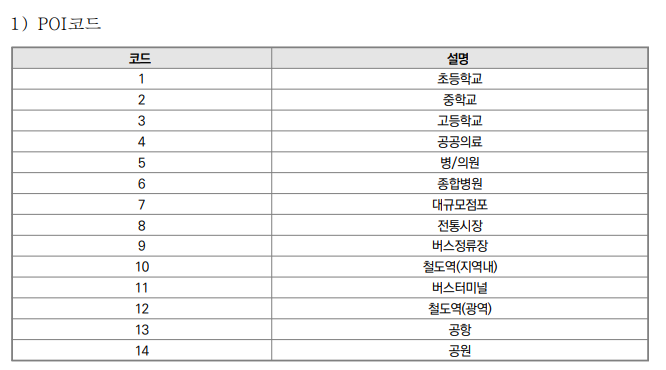

#### 도보 접근가능 시설수에서는 11,12,13 시설에 대한 데이터가 없다.

#### 시도코드로 서울 추출시 도보접근가능시설에 불가능한 시설이 포함되는 것을 식별. 따라서 필지고유번호로 서울 데이터를 추출 시도.

In [2]:
import pandas as pd
import numpy as np
from glob import glob

file_names = glob('../data/other_data/도보 접근가능 시설수/*.csv')
total = pd.DataFrame()

for file_name in file_names:
    temp = pd.read_csv(file_name, low_memory = False)
    total = pd.concat([total, temp])

total = total[total['PNU'].astype(str).str.startswith('11')]    # 서울 데이터만 추출
total.to_csv('../data/other_data/도보 접근가능 시설수.csv',index=False)

#### 필지고유번호와 poi코드로 오름차순 정렬

In [62]:
walk = pd.read_csv('../data/other_data/도보 접근가능 시설수.csv',low_memory = False)
walk.drop(columns=['DATA_STRD_YM','LOT_NO','CTPR_CD','SIGNGU_CD','LEGALDONG_CD','NERST_POI_NM'],inplace=True)
walk.columns = ['필지고유번호','POI코드','도보접근가능시설수','1분','2분','3분','4분','5분','6분','7분','8분','9분','10분','11분','12분','13분','14분','15분','16분','17분','18분','19분','20분','21분','22분','23분','24분','25분','26분','27분','28분','29분','30분']
walk = walk.sort_values(by=['필지고유번호','POI코드'])
walk.reset_index(drop = True, inplace=True)
walk.head(20)

,필지고유번호,POI코드,도보접근가능시설수,1분,2분,3분,4분,5분,6분,7분,8분,9분,10분,11분,12분,13분,14분,15분,16분,17분,18분,19분,20분,21분,22분,23분,24분,25분,26분,27분,28분,29분,30분
0,1111010100100010000,1,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,2,0,1
1,1111010100100010000,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1111010100100010000,3,5,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,1111010100100010000,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1111010100100010000,5,88,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,1,0,4,1,5,8,1,11,4,3,5,40
5,1111010100100010000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1111010100100010000,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,1111010100100010000,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
8,1111010100100010000,9,168,0,0,1,0,0,1,2,0,2,1,0,1,0,3,1,0,5,2,6,10,2,9,11,8,11,14,20,12,19,27
9,1111010100100010000,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2


#### 필지고유번호가 같은 것들끼리의 단순 합으로 변경

In [63]:
walk_sum = walk.drop(columns=['POI코드']).groupby('필지고유번호',as_index=False).agg('sum')
walk_sum

,필지고유번호,도보접근가능시설수,1분,2분,3분,4분,5분,6분,7분,8분,9분,10분,11분,12분,13분,14분,15분,16분,17분,18분,19분,20분,21분,22분,23분,24분,25분,26분,27분,28분,29분,30분
0,1111010100100010000,291,0,0,1,0,0,4,3,0,3,2,0,2,0,3,2,0,9,4,7,10,9,12,18,18,12,28,24,20,24,76
1,1111010100100010002,275,0,0,0,2,2,0,3,4,0,1,2,2,1,1,1,9,5,4,7,6,7,11,16,27,14,17,23,18,35,57
2,1111010100100010003,304,0,0,0,2,2,0,4,3,0,1,2,2,1,1,3,7,6,4,7,5,9,10,16,25,18,19,21,21,39,76
3,1111010100100010005,309,1,0,0,1,1,1,3,2,1,1,2,0,2,2,2,1,3,10,10,9,11,15,10,13,25,23,21,24,36,79
4,1111010100100020001,348,1,1,1,1,0,1,2,0,2,1,1,4,0,0,2,3,8,12,2,18,10,6,22,20,12,19,30,33,58,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674918,1174011000107200000,422,1,3,3,2,3,17,5,4,5,5,12,20,12,10,15,11,9,30,15,15,11,11,11,10,15,69,46,22,16,14
674919,1174011000107210000,425,1,2,4,0,4,8,13,7,2,6,12,21,13,5,13,16,13,21,24,10,19,2,13,10,26,58,47,18,19,18
674920,1174011000107220000,424,2,2,3,3,2,8,13,5,3,7,13,17,15,9,13,8,18,30,13,15,15,6,9,10,19,67,39,25,19,16
674921,1174011000107230000,426,2,3,2,2,3,18,6,2,3,6,14,18,11,13,10,12,15,28,13,17,16,5,13,9,15,51,53,32,19,15


#### 필지고유번호를 지번주소로 변경

In [65]:
division = pd.read_csv('../data/other_data/division.csv')
division['법정동코드'] = division['법정동코드'].astype(str)

walk_sum['법정동코드'] = walk_sum['필지고유번호'].astype(str).str[:8]
walk_sum = pd.merge(walk_sum,division,on='법정동코드',how='left')

walk_sum['본번'] = (walk_sum['필지고유번호']//10000%10000).astype(str)
walk_sum['부번'] = (walk_sum['필지고유번호']%10000).astype(str)
print(sum(walk_sum['본번'] == '0'))
print(sum(walk_sum['부번'] == '0'))
walk_sum.loc[walk_sum['부번']=='0','부번'] = np.nan
walk_sum['지번주소'] = walk_sum['주소']+walk_sum['본번'].apply(lambda x: '' if pd.isna(x) else ' ' + x)+walk_sum['부번'].apply(lambda x: '' if pd.isna(x) else '-' + x)
walk_sum.drop(columns=['법정동코드','본번','부번','주소'],inplace=True)

walk_sum = walk_sum[[list(walk_sum.columns)[0],list(walk_sum.columns)[-1]]+list(walk_sum.columns)[1:-1]]
walk_sum

6
37894


,필지고유번호,지번주소,도보접근가능시설수,1분,2분,3분,4분,5분,6분,7분,8분,9분,10분,11분,12분,13분,14분,15분,16분,17분,18분,19분,20분,21분,22분,23분,24분,25분,26분,27분,28분,29분,30분
0,1111010100100010000,서울특별시 종로구 청운동 1,291,0,0,1,0,0,4,3,0,3,2,0,2,0,3,2,0,9,4,7,10,9,12,18,18,12,28,24,20,24,76
1,1111010100100010002,서울특별시 종로구 청운동 1-2,275,0,0,0,2,2,0,3,4,0,1,2,2,1,1,1,9,5,4,7,6,7,11,16,27,14,17,23,18,35,57
2,1111010100100010003,서울특별시 종로구 청운동 1-3,304,0,0,0,2,2,0,4,3,0,1,2,2,1,1,3,7,6,4,7,5,9,10,16,25,18,19,21,21,39,76
3,1111010100100010005,서울특별시 종로구 청운동 1-5,309,1,0,0,1,1,1,3,2,1,1,2,0,2,2,2,1,3,10,10,9,11,15,10,13,25,23,21,24,36,79
4,1111010100100020001,서울특별시 종로구 청운동 2-1,348,1,1,1,1,0,1,2,0,2,1,1,4,0,0,2,3,8,12,2,18,10,6,22,20,12,19,30,33,58,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674918,1174011000107200000,서울특별시 강동구 강일동 720,422,1,3,3,2,3,17,5,4,5,5,12,20,12,10,15,11,9,30,15,15,11,11,11,10,15,69,46,22,16,14
674919,1174011000107210000,서울특별시 강동구 강일동 721,425,1,2,4,0,4,8,13,7,2,6,12,21,13,5,13,16,13,21,24,10,19,2,13,10,26,58,47,18,19,18
674920,1174011000107220000,서울특별시 강동구 강일동 722,424,2,2,3,3,2,8,13,5,3,7,13,17,15,9,13,8,18,30,13,15,15,6,9,10,19,67,39,25,19,16
674921,1174011000107230000,서울특별시 강동구 강일동 723,426,2,3,2,2,3,18,6,2,3,6,14,18,11,13,10,12,15,28,13,17,16,5,13,9,15,51,53,32,19,15


#### 아파트단지에 해당하는 주소를 가진 데이터 추출

In [66]:
apt_map = pd.read_csv('../data/other_data/apt_map.csv')
walk_sum = walk_sum[walk_sum['지번주소'].isin(apt_map['지번주소'])]
walk_sum = walk_sum.reset_index(drop=True)
walk_sum

,필지고유번호,지번주소,도보접근가능시설수,1분,2분,3분,4분,5분,6분,7분,8분,9분,10분,11분,12분,13분,14분,15분,16분,17분,18분,19분,20분,21분,22분,23분,24분,25분,26분,27분,28분,29분,30분
0,1111011800100720000,서울특별시 종로구 내수동 72,942,1,1,4,14,17,15,17,17,16,16,34,27,34,38,47,61,48,50,44,45,37,37,40,56,44,28,45,44,26,39
1,1111017100100040000,서울특별시 종로구 명륜2가 4,667,1,4,11,12,7,12,5,3,6,7,18,18,18,17,18,26,18,18,11,18,27,28,50,34,43,57,57,45,34,44
2,1111017400102320000,서울특별시 종로구 창신동 232,953,0,10,24,13,11,14,10,11,9,17,22,28,23,23,38,29,29,52,40,39,51,40,29,48,37,32,67,63,62,82
3,1111017400107020000,서울특별시 종로구 창신동 702,912,0,3,6,4,4,6,9,3,7,9,23,25,24,24,26,30,40,55,44,70,60,41,47,50,41,29,60,50,70,52
4,1111017400107030000,서울특별시 종로구 창신동 703,872,0,1,4,3,6,4,4,8,7,7,8,13,52,34,21,62,59,40,51,37,46,53,44,37,44,55,26,38,49,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,1174011000106950000,서울특별시 강동구 강일동 695,392,0,3,1,4,0,3,5,1,9,7,10,15,19,11,10,40,47,24,26,14,11,18,11,8,20,7,19,11,25,13
2118,1174011000106990000,서울특별시 강동구 강일동 699,383,1,2,0,2,2,3,2,4,7,11,18,12,16,21,16,11,10,26,50,29,19,15,12,9,19,18,16,6,16,10
2119,1174011000107010000,서울특별시 강동구 강일동 701,372,0,0,2,1,4,8,11,5,9,6,8,11,17,19,7,5,12,44,25,34,21,8,15,14,20,22,9,20,8,7
2120,1174011000107070000,서울특별시 강동구 강일동 707,409,0,1,1,2,0,0,12,21,12,9,11,11,9,6,6,7,15,8,24,14,10,14,22,40,16,37,34,34,15,18


In [67]:
walk_sum.to_feather('../data/make_data/도보시설수_합계.feather')

# 차량 접근가능 시설수.csv

In [1]:
import pandas as pd
import numpy as np
from glob import glob

file_names = glob('../data/other_data/차량 접근가능 시설수/*.csv')
total = pd.DataFrame()

for file_name in file_names:
    temp = pd.read_csv(file_name, low_memory = False)
    total = pd.concat([total, temp])

total = total[total['PNU'].astype(str).str.startswith('11')]    # 서울 데이터만 추출
total.to_csv('../data/other_data/차량 접근가능 시설수.csv',index=False)

In [73]:
import pandas as pd
import numpy as np

car = pd.read_csv('../data/other_data/차량 접근가능 시설수.csv',low_memory = False)
car.drop(columns=['DATA_STRD_YM','LOT_NO','CTPR_CD','SIGNGU_CD','LEGALDONG_CD','APRC_CD','NERST_POI_NM'],inplace=True)
car.columns = ['필지고유번호','POI코드','차량접근가능시설수','5분','10분','15분','20분','25분','30분','35분','40분','45분','50분','55분','60분','65분','70분','75분','80분','85분','90분','95분','100분','105분','110분','115분','120분']
car = car.sort_values(by=['필지고유번호','POI코드'])
car.reset_index(drop = True, inplace=True)
car

,필지고유번호,POI코드,차량접근가능시설수,5분,10분,15분,20분,25분,30분,35분,40분,45분,50분,55분,60분,65분,70분,75분,80분,85분,90분,95분,100분,105분,110분,115분,120분
0,1111010100100010000,2,247,2,7,21,42,62,52,26,27,2,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1111010100100010000,3,238,6,10,37,40,54,42,24,18,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1111010100100010000,4,54,1,1,5,7,11,7,4,6,5,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0
3,1111010100100010000,5,10796,117,617,1410,1853,3435,1871,847,496,110,16,16,8,0,0,0,0,0,0,0,0,0,0,0,0
4,1111010100100010000,6,20,1,2,2,3,7,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7424148,1174011000107270000,8,373,5,16,43,33,52,52,51,45,22,18,28,8,0,0,0,0,0,0,0,0,0,0,0,0
7424149,1174011000107270000,11,60,0,1,1,7,1,5,6,10,9,5,11,4,0,0,0,0,0,0,0,0,0,0,0,0
7424150,1174011000107270000,12,56,0,0,1,10,10,4,5,6,7,7,4,2,0,0,0,0,0,0,0,0,0,0,0,0
7424151,1174011000107270000,13,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
car_sum = car.drop(columns=['POI코드']).groupby('필지고유번호',as_index=False).agg('sum')
car_sum

,필지고유번호,차량접근가능시설수,5분,10분,15분,20분,25분,30분,35분,40분,45분,50분,55분,60분,65분,70분,75분,80분,85분,90분,95분,100분,105분,110분,115분,120분
0,1111010100100010000,13287,153,728,1693,2208,4072,2313,1125,740,169,40,32,14,0,0,0,0,0,0,0,0,0,0,0,0
1,1111010100100010002,13287,153,728,1693,2208,4072,2313,1125,740,169,40,32,14,0,0,0,0,0,0,0,0,0,0,0,0
2,1111010100100010003,13287,153,728,1693,2208,4072,2313,1125,740,169,40,32,14,0,0,0,0,0,0,0,0,0,0,0,0
3,1111010100100010005,15894,106,793,1712,2878,4552,3262,1410,768,288,58,47,20,0,0,0,0,0,0,0,0,0,0,0,0
4,1111010100100020001,15894,106,793,1712,2878,4552,3262,1410,768,288,58,47,20,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674918,1174011000107200000,33768,362,1600,3154,5146,4333,5426,4857,3604,2221,1224,1158,683,0,0,0,0,0,0,0,0,0,0,0,0
674919,1174011000107210000,33768,362,1600,3154,5146,4333,5426,4857,3604,2221,1224,1158,683,0,0,0,0,0,0,0,0,0,0,0,0
674920,1174011000107220000,33768,362,1600,3154,5146,4333,5426,4857,3604,2221,1224,1158,683,0,0,0,0,0,0,0,0,0,0,0,0
674921,1174011000107230000,33768,362,1600,3154,5146,4333,5426,4857,3604,2221,1224,1158,683,0,0,0,0,0,0,0,0,0,0,0,0


#### 필지고유번호를 지번주소로 변경

In [75]:
division = pd.read_csv('../data/other_data/division.csv')
division['법정동코드'] = division['법정동코드'].astype(str)

car_sum['법정동코드'] = car_sum['필지고유번호'].astype(str).str[:8]
car_sum = pd.merge(car_sum,division,on='법정동코드',how='left')

car_sum['본번'] = (car_sum['필지고유번호']//10000%10000).astype(str)
car_sum['부번'] = (car_sum['필지고유번호']%10000).astype(str)
print(sum(car_sum['본번'] == '0'))
print(sum(car_sum['부번'] == '0'))
car_sum.loc[car_sum['부번']=='0','부번'] = np.nan
car_sum['지번주소'] = car_sum['주소']+car_sum['본번'].apply(lambda x: '' if pd.isna(x) else ' ' + x)+car_sum['부번'].apply(lambda x: '' if pd.isna(x) else '-' + x)
car_sum.drop(columns=['법정동코드','본번','부번','주소'],inplace=True)

car_sum = car_sum[[list(car_sum.columns)[0],list(car_sum.columns)[-1]]+list(car_sum.columns)[1:-1]]
car_sum

6
37894


,필지고유번호,지번주소,차량접근가능시설수,5분,10분,15분,20분,25분,30분,35분,40분,45분,50분,55분,60분,65분,70분,75분,80분,85분,90분,95분,100분,105분,110분,115분,120분,Unnamed: 0
0,1111010100100010000,서울특별시 종로구 청운동 1,13287,153,728,1693,2208,4072,2313,1125,740,169,40,32,14,0,0,0,0,0,0,0,0,0,0,0,0,2
1,1111010100100010002,서울특별시 종로구 청운동 1-2,13287,153,728,1693,2208,4072,2313,1125,740,169,40,32,14,0,0,0,0,0,0,0,0,0,0,0,0,2
2,1111010100100010003,서울특별시 종로구 청운동 1-3,13287,153,728,1693,2208,4072,2313,1125,740,169,40,32,14,0,0,0,0,0,0,0,0,0,0,0,0,2
3,1111010100100010005,서울특별시 종로구 청운동 1-5,15894,106,793,1712,2878,4552,3262,1410,768,288,58,47,20,0,0,0,0,0,0,0,0,0,0,0,0,2
4,1111010100100020001,서울특별시 종로구 청운동 2-1,15894,106,793,1712,2878,4552,3262,1410,768,288,58,47,20,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674918,1174011000107200000,서울특별시 강동구 강일동 720,33768,362,1600,3154,5146,4333,5426,4857,3604,2221,1224,1158,683,0,0,0,0,0,0,0,0,0,0,0,0,492
674919,1174011000107210000,서울특별시 강동구 강일동 721,33768,362,1600,3154,5146,4333,5426,4857,3604,2221,1224,1158,683,0,0,0,0,0,0,0,0,0,0,0,0,492
674920,1174011000107220000,서울특별시 강동구 강일동 722,33768,362,1600,3154,5146,4333,5426,4857,3604,2221,1224,1158,683,0,0,0,0,0,0,0,0,0,0,0,0,492
674921,1174011000107230000,서울특별시 강동구 강일동 723,33768,362,1600,3154,5146,4333,5426,4857,3604,2221,1224,1158,683,0,0,0,0,0,0,0,0,0,0,0,0,492


#### 아파트단지에 해당하는 주소를 가진 데이터 추출

In [76]:
apt_map = pd.read_csv('../data/other_data/apt_map.csv')

car_sum = car_sum[car_sum['지번주소'].isin(apt_map['지번주소'])]
car_sum = car_sum.reset_index(drop=True)
car_sum

,필지고유번호,지번주소,차량접근가능시설수,5분,10분,15분,20분,25분,30분,35분,40분,45분,50분,55분,60분,65분,70분,75분,80분,85분,90분,95분,100분,105분,110분,115분,120분,Unnamed: 0
0,1111011800100720000,서울특별시 종로구 내수동 72,21826,531,1298,2375,4194,4665,4198,2447,1260,447,321,66,24,0,0,0,0,0,0,0,0,0,0,0,0,19
1,1111017100100040000,서울특별시 종로구 명륜2가 4,19054,425,1057,2026,3453,4301,3085,2155,1301,780,389,56,26,0,0,0,0,0,0,0,0,0,0,0,0,72
2,1111017400102320000,서울특별시 종로구 창신동 232,19525,584,1153,2542,4213,3925,2718,2095,1488,406,286,89,26,0,0,0,0,0,0,0,0,0,0,0,0,75
3,1111017400107020000,서울특별시 종로구 창신동 702,13322,366,1072,1802,3208,2644,1813,1132,765,296,194,21,9,0,0,0,0,0,0,0,0,0,0,0,0,75
4,1111017400107030000,서울특별시 종로구 창신동 703,6592,309,744,1229,1597,1518,708,322,128,31,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,1174011000106950000,서울특별시 강동구 강일동 695,22011,320,1535,2504,4708,3949,3445,2647,1602,634,316,305,46,0,0,0,0,0,0,0,0,0,0,0,0,492
2118,1174011000106990000,서울특별시 강동구 강일동 699,22011,320,1535,2504,4708,3949,3445,2647,1602,634,316,305,46,0,0,0,0,0,0,0,0,0,0,0,0,492
2119,1174011000107010000,서울특별시 강동구 강일동 701,33493,348,1721,3188,5352,4189,5333,4770,3482,2103,1195,1119,693,0,0,0,0,0,0,0,0,0,0,0,0,492
2120,1174011000107070000,서울특별시 강동구 강일동 707,17651,281,858,1823,3622,3727,3273,2247,1339,357,93,15,16,0,0,0,0,0,0,0,0,0,0,0,0,492


In [72]:
car_sum.to_feather('../data/make_data/차량시설수_합계.feather')

# 생활권 환경지수.csv

In [13]:
environ = pd.read_csv('../data/other_data/apt_environment.csv',encoding='cp949')
environ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구코드   2643 non-null   int64  
 1   법정동코드   2643 non-null   int64  
 2   단지코드    2643 non-null   object 
 3   단지명     2643 non-null   object 
 4   세대수     2643 non-null   int64  
 5   법정동주소   2643 non-null   object 
 6   공원수     2643 non-null   int64  
 7   공원총면적   2643 non-null   float64
 8   생활지수    2643 non-null   int64  
 9   생활지수명   2643 non-null   object 
 10  평가점수    2643 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 227.3+ KB


#### 인덱스로 사용할 지번주소 생성

In [14]:
environ['지번주소'] = environ.apply(lambda row: row['법정동주소'][:-len(row['단지명'])] if row['법정동주소'].endswith(row['단지명']) else row['법정동주소'], axis=1)
environ.head(6)

,시군구코드,법정동코드,단지코드,단지명,세대수,법정동주소,공원수,공원총면적,생활지수,생활지수명,평가점수,지번주소
0,11110,1111011500,A11005401,광화문풍림스페이스본 아파트,744,서울특별시 종로구 사직동 9 광화문풍림스페이스본 아파트,12,317184.27,4,중하위권,81,서울특별시 종로구 사직동 9
1,11110,1111011800,A11007001,경희궁의아침3단지,150,서울특별시 종로구 내수동 72 경희궁의아침3단지,16,321615.17,4,중하위권,81,서울특별시 종로구 내수동 72
2,11110,1111011800,A11087101,경희궁의아침2단지,90,서울특별시 종로구 내수동 71 경희궁의아침2단지,16,322286.17,4,중하위권,81,서울특별시 종로구 내수동 71
3,11110,1111012400,A11014001,로얄팰리스스위트,23,서울특별시 종로구 수송동 85 로얄팰리스스위트,15,67828.60,4,중하위권,71,서울특별시 종로구 수송동 85
4,11110,1111013300,A11034001,현대뜨레비앙,291,서울특별시 종로구 익선동 55 현대뜨레비앙,8,533213.30,3,중위권,85,서울특별시 종로구 익선동 55
5,11110,1111015700,A11041001,효성주얼리시티아파트,298,서울특별시 종로구 인의동 48-2 효성주얼리시티아파트,9,56941.80,4,중하위권,70,서울특별시 종로구 인의동 48-2


#### 불필요한 변수 제거

In [15]:
environ.drop(columns=['시군구코드','법정동코드','단지코드','단지명','법정동주소'],inplace=True)
environ.head(6)

,세대수,공원수,공원총면적,생활지수,생활지수명,평가점수,지번주소
0,744,12,317184.27,4,중하위권,81,서울특별시 종로구 사직동 9
1,150,16,321615.17,4,중하위권,81,서울특별시 종로구 내수동 72
2,90,16,322286.17,4,중하위권,81,서울특별시 종로구 내수동 71
3,23,15,67828.60,4,중하위권,71,서울특별시 종로구 수송동 85
4,291,8,533213.30,3,중위권,85,서울특별시 종로구 익선동 55
5,298,9,56941.80,4,중하위권,70,서울특별시 종로구 인의동 48-2


In [16]:
environ.to_feather('../data/make_data/생활환경지수.feather')